In [26]:
import numpy as np

# step-1: 

at low M field use $E = g_f \mu_B B  m_F$, to get $g_f$, then compare with theoratical value of $g_f = \pm $ 1/3 for 85 and $\pm 1/2$ for 87 

$g_f = $Eh/\mu_B B = $. also affirmed by the theoratical prediction of frequency ratio $E(85)/E(87) = g_f(85)/g_f(87)=2/3$, and absorption ratio is related to population of 85 and 87 (the sample contain more 85)


$g_F = \frac{E}{\mu_B B m_F}= \frac{E}{\mu_B  B}$

In [4]:
# B = 0.06*1e-3 # T
B = 0.09*1e-3 # T

muB_in_frequency = 14 # GHz / T

In [5]:
frequency = 380 #kHz
frequency / muB_in_frequency / B *1e-6

0.30158730158730157

In [6]:
frequency = 590 #kHz
frequency / muB_in_frequency / B *1e-6

0.4682539682539683

# low field, derive g factors

total angular momemtum $F = I \pm J$, where $J=1/2$ is the electron spin

for $^{87}Rb$ $I = 3/2$, hyperfine levels are $F = 1,2$

for  $^{85}Rb$ $I = 5/2$, hyperfine levels are $F = 2,3$


In [7]:
def gJ(J, S, L):
    return 1+(J*(J+1)+S*(S+1)-L*(L+1))/(2*J*(J+1))
def gF(gJ, F, J, I):
    return gJ*(F*(F+1) + J*(J+1)-I*(I+1))/(2*F*(F+1))

In [8]:
# 85 Rb
J = 1/2
S = 1/2
L = 0
F = 2
I = 5/2
gj = gJ(J, S, L)
gF(gj, F, J, I)

-0.3333333333333333

In [9]:
# 85 Rb
J = 1/2
S = 1/2
L = 0
F = 3
I = 5/2
gj = gJ(J, S, L)
gF(gj, F, J, I)

0.3333333333333333

In [10]:
# 87 Rb
J = 1/2
S = 1/2
L = 0
F = 1
I = 3/2
gj = gJ(J, S, L)
gF(gj, F, J, I)

-0.5

In [11]:
# 87 Rb
J = 1/2
S = 1/2
L = 0
F = 2
I = 3/2
gj = gJ(J, S, L)
gF(gj, F, J, I) 

0.5

In [12]:
muB_in_frequency = 14 # GHz / T

def weekfield_frequency(B,#in mili Tesla
              mF,
              gf):
    return  gf * muB_in_frequency * B  * mF # in MHz

In [13]:
hyperfine_spacing = 6.8
B = 1e-1
x = 2 /hyperfine_spacing * muB_in_frequency * B  * 1e-1  # unitless
x

0.04117647058823531

In [34]:
def strongfield_transition_frequency(F,
                                     B, # in mT
                                     I):
        
    if I == 3/2:
        hyperfine_spacing = 6.8 #GHz   
    elif I == 5/2:
        hyperfine_spacing = 3.1 #GHz   
    gj = 2
    gi = 0
    x = (gj+gi) /hyperfine_spacing * muB_in_frequency* B * 1e-1# unitless

    def difference_of_sqrt(mF1,mF2):
        return np.abs(np.sqrt(1+4*mF1/(2*I + I)*x + x**2)  - np.sqrt(1+4*mF2/(2*I + I)*x + x**2))
    
    if F == 1:
        return {
            '-1,0':difference_of_sqrt(-1,0),
            '0,1':difference_of_sqrt(0,1),
            }
    elif F == 2:
        return {
            '-2,-1':difference_of_sqrt(-2,-1),
            '-1,0':difference_of_sqrt(-1,0),
            '0,1':difference_of_sqrt(0,1),
            '1,2':difference_of_sqrt(1,2),
            }
    elif F == 3:
        return {
            '-3,-2':difference_of_sqrt(-3,-2),
            '-2,-1':difference_of_sqrt(-2,-1),
            '-1,0':difference_of_sqrt(-1,0),
            '0,1':difference_of_sqrt(0,1),
            '1,2':difference_of_sqrt(1,2),
            '2,3':difference_of_sqrt(2,3),  
            }

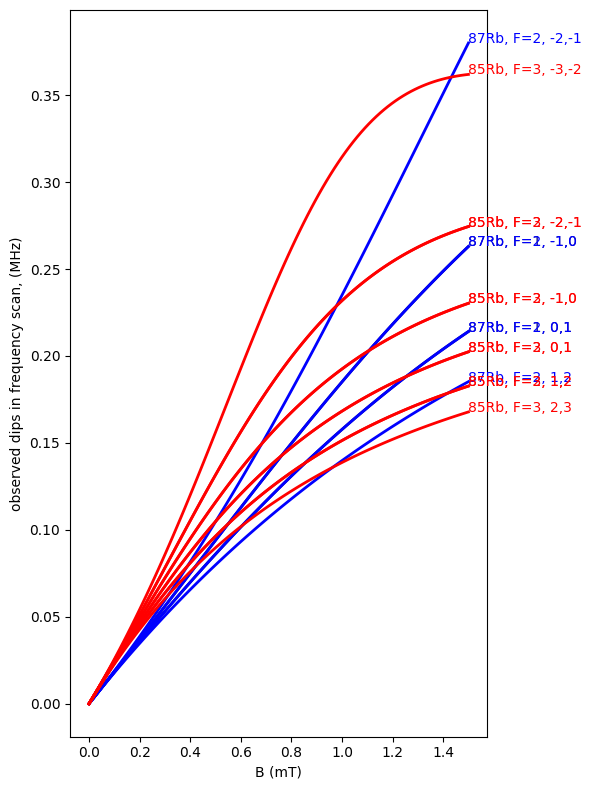

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize = (6,8))

B_list = np.linspace(0,1.5,100) # in mT

strong_field_freq = {3/2:{1:{'-1,0':[],'0,1':[]},
                         2:{'-2,-1':[],'-1,0':[],'0,1':[],'1,2':[]}},
                    5/2:{2:{'-2,-1':[],'-1,0':[],'0,1':[],'1,2':[]},
                        3:{'-3,-2':[],'-2,-1':[],'-1,0':[],'0,1':[],'1,2':[],'2,3':[]}}}
for I, F_list,name in zip([3/2, 5/2],
                          [[1,2],[2,3]],
                      ['87','85']):
    for F in F_list:
        for B in B_list:
            result = strongfield_transition_frequency(F=F,
                                                    B =B, 
                                                    I = I)
            for key in strong_field_freq[I][F].keys():
                strong_field_freq[I][F][key].append(np.abs(result[key]))

for I, F_list,name in zip([3/2,5/2],
                          [[1,2],[2,3]],
                      ['87','85']):
    for F in F_list:
        for key in strong_field_freq[I][F].keys():
            if I == 3/2:
                if F == 1:
                    color = 'darkblue'
                elif F == 2:
                    color = 'blue'
            elif I == 5/2:
                if F == 1:
                    color = 'darkred'
                elif F == 2:
                    color = 'red'
            plt.plot(B_list,strong_field_freq[I][F][key],lw=2,color = color,label = f'{name}Rb, F={F}, {key}')
            plt.text(
                     B_list[-1],
                     strong_field_freq[I][F][key][-1],
                     f'{name}Rb, F={F}, {key}',color=color)
# plt.legend(loc = 'upper right')
plt.xlabel('B (mT)')
plt.ylabel('observed dips in frequency scan, (MHz)')
plt.tight_layout()